In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [28]:
df = pd.read_csv('sredjeni_kurs.csv', parse_dates=True)
print(df.head())

  APPLICATION DATE  MIDDLE EXCHANGE RATE
0       2003-01-01               61.5845
1       2003-01-02               61.5845
2       2003-01-03               61.5845
3       2003-01-04               61.6615
4       2003-01-05               61.6615


In [30]:
# Konvertujte kolonu 'APPLICATION DATE' u tip datuma
df['APPLICATION DATE'] = pd.to_datetime(df['APPLICATION DATE'])
# Dodavanje kolona godina i meseca u DataFrame
df['Year'] = df['APPLICATION DATE'].dt.year
df['Month'] = df['APPLICATION DATE'].dt.month

In [33]:
# Postavljanje 'APPLICATION DATE' kao indeks
df.set_index('APPLICATION DATE', inplace=True, drop=False)

In [34]:
print(df.head())

                 APPLICATION DATE  MIDDLE EXCHANGE RATE  Year  Month
APPLICATION DATE                                                    
2003-01-01             2003-01-01               61.5845  2003      1
2003-01-02             2003-01-02               61.5845  2003      1
2003-01-03             2003-01-03               61.5845  2003      1
2003-01-04             2003-01-04               61.6615  2003      1
2003-01-05             2003-01-05               61.6615  2003      1


Duzina sezonskog perioda:365

In [35]:
# Treniranje STL modela
stl_model = STL(df['MIDDLE EXCHANGE RATE'], seasonal=365)
result = stl_model.fit()

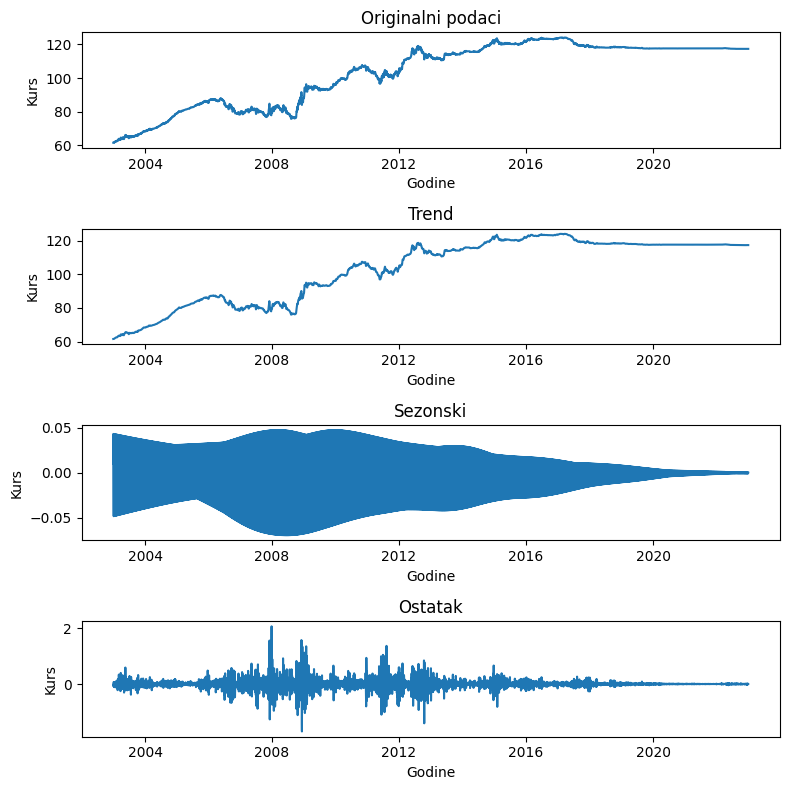

In [36]:
plt.figure(figsize=(8, 8)) 

# Originalni podaci
plt.subplot(4, 1, 1)
plt.plot(df.index[:-365], df['MIDDLE EXCHANGE RATE'][:-365])
plt.title('Originalni podaci')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Trend
plt.subplot(4, 1, 2)
plt.plot(df.index[:-365],result.trend[:-365])
plt.title('Trend')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Sezonski
plt.subplot(4, 1, 3)
plt.plot(df.index[:-365], result.seasonal[:-365])
plt.title('Sezonski')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Ostatak
plt.subplot(4, 1, 4)
plt.plot(df.index[:-365], result.resid[:-365])
plt.title('Ostatak')
plt.xlabel('Godine')
plt.ylabel('Kurs')

plt.tight_layout()
plt.show()


Duzina sezonskog perioda:31

In [37]:
# Treniranje STL modela
stl_model2 = STL(df['MIDDLE EXCHANGE RATE'], seasonal=31)
result2 = stl_model2.fit()

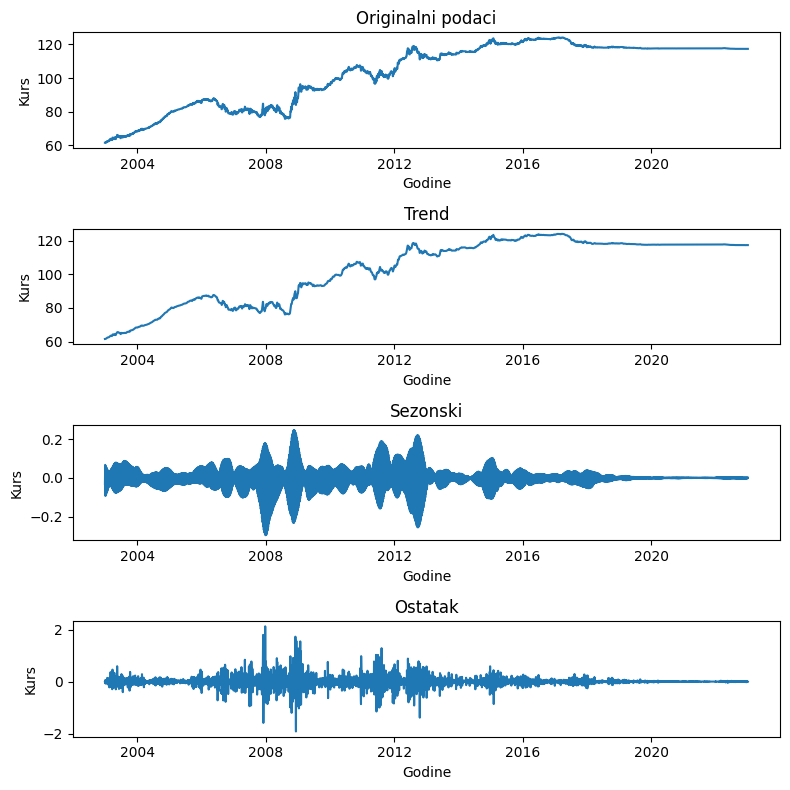

In [38]:
plt.figure(figsize=(8, 8)) 

# Originalni podaci
plt.subplot(4, 1, 1)
plt.plot(df.index[:-365], df['MIDDLE EXCHANGE RATE'][:-365])
plt.title('Originalni podaci')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Trend
plt.subplot(4, 1, 2)
plt.plot(df.index[:-365],result2.trend[:-365])
plt.title('Trend')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Sezonski
plt.subplot(4, 1, 3)
plt.plot(df.index[:-365], result2.seasonal[:-365])
plt.title('Sezonski')
plt.xlabel('Godine')
plt.ylabel('Kurs')

# Ostatak
plt.subplot(4, 1, 4)
plt.plot(df.index[:-365], result2.resid[:-365])
plt.title('Ostatak')
plt.xlabel('Godine')
plt.ylabel('Kurs')

plt.tight_layout()
plt.show()
